# Урок 6. Задача lookalike (Positive Unlabeled Learning)#

<img src='https://drive.google.com/uc?export=view&id=1tgPJoFNVVULBpB8DcT2O0AYnSgZolbEH'>

Пример задачи - один клиент в магазине не купил корм для кошек, но если мы ему скажем о корме, может ли он его купить?

Программа урока:
1. Теоретическая часть:

     - Задача обучения с учителем (повторение)
     - Примеры кейсов, когда разметка содержит только наблюдения положительного класса
     - Какие задачи не относятся к lookalike


2. Практическая часть
    - Метод решения random negative sampling
    - Метод 2-step approach
    - Метод spy
    - Сравнение методов между собой на датасете, для которого метки известны
    - Сравнение лучшего метода с моделью, построенной на данных, для которых известны метки всех классов

<img src='https://drive.google.com/uc?export=view&id=1EqTtbS848-pfoWA-MTV8scVmbYyoB0Sy' width=800>

Т.е в "стандартной" постановке задачи обучения с учителем у нас есть разметка.

Например, если мы решаем задачу бинарной классификации, то у нас есть объекты с метками обоих классов (positive/negative).

На практике часто бывает так, что мы сравнительно легко можем определить объекты одного класса (дпопустим, мы легко понимаем, какие объекты можно назвать положительными), но при этом возникают сложности с определением объектов другого класса (негативы).

<img src='https://drive.google.com/uc?export=view&id=1begp9Rz9FI0DZ1Ff_jmcYRlYsK9SIXHB'>

Примеры задач:

- Продвижение услуг и приложений
- Выделение сегмента пользователей, которые совершат нужное нам целевое действие

<img src='https://drive.google.com/uc?export=view&id=1FoFble2hEnexFOpIbQWyMheFv92Tlieh'>

a) Выделяем только группу позитивно размеченного класса. Хорошей похожести вряд ли найдем, т.к. ищем похожих только в одной группе

b) Строим более интересную границу, чтобы обобщить неразмеченные объекты и интерпретировать их не как отрицание, а как положительный объект.

### Более формальное описание задачи

1. оценивается вероятность того, что пользователь совершит некоторое целевое действие (приобретение подписки, установка или регистрация в приложении и т.д)
2. У нас есть только те, кто совершил это действие - это positives. При этом нет определения того, что такое negative. Все, кроме P - Unlabeled (U)
3. Нам нужно как-то собрать выборку и обучить модель, которая будет отличать P от N 


Обучение на PU данных нетривиально. Существует 2 возможных объяснения, почему конкретный объект не имеет метки класса:
1. это объект класса 0 (True negative)
2. это объект класса 1, но просто неразмеченный

## PU learning (варианты решения)


1. Random negative sampling
2. 2-step approach
3. SPY
4. … (много других)

### 1. Random negative sampling

Другое название random negative sampling -> The Selected Completely At Random (SCAR)

- Семплируем подможножество из U и присваиваем им метку 0 (множество N)
- Строим бинарный классификатор, который учится различать N от P
- Используем полученный классификатор без дополнительных телодвижений


Здесь не можем строить точную модель, т.к. не уверены в своем множестве N, так что нужно позволить модели ошибаться.

- random negative sampling основан на предположении, что размеченные данные являются независимыми и одинаково распределенными
- random negative sampling очень популярен, но главным образом благодаря тому, что проблема в итоге сводится к задаче бинарной классификации

Ниже на картинке пример, если размеченные данные (Labeled Positive) выбраны независимо и равновероятно из генеральной совокупности (множества всех позитивов - Unlabeled Positive)

<img src='https://drive.google.com/uc?export=view&id=1iLurg0reVcqyb1UJqnQDVLY2vk9az6jo' width=600>

Ниже на картинке пример, где мы уже видим, что семплирование смещено. 

<img src='https://drive.google.com/uc?export=view&id=17vzbOt7QrAEA2AN6lAVTkE4p36TEfFPC' width=600>

RNS - одностадийный и слишком простой.

### 2-step approach

<img src='https://drive.google.com/uc?export=view&id=1KQKwTm_Wx68SLal456Bk8oVMtgkgsRjf' width=600>

#### Или словами:

1. определяем RN (reliable negatives) (по факту это делаем шаг Random Negative Sampling'a).
2. Используем метод обучения с учителем для обучения классификатора на P, RN
3. Сделаем предсказание этой моделью на всем множестве U, проскорим и выберем топ объектов, которые вероятней всего принадлежат множеству N.
4. Обучаем еще раз модель на P и проскоренных N из RN.
5. Можно повторять шаги несколько раз.

### 3. Алгоритм Spy


<img src='https://drive.google.com/uc?export=view&id=1MYczAPDN0rlCyvf2fFS4_KaytGHreTGt'>

- Семплируем множество S из P и помещаем их в U
- S - это шпионы (позитивные примеры)
- Обучение классификатор на P-S (метка 1) и UuS (метка 0)
- Смотрим, какие вероятности получили элементы S, чтобы определить порог для выбора RN (надежные негативы)


### Разметить все неразмеченные данные как Negatives

Но конечно такой метод на практике почти не используется, хотя и очень прост и понятен.

## Пример 1

1. сгенерируем игрушечный датасет из двух множеств так, чтобы они немного пересекались с помощью https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

2. Нарисуем график с нашими и данными. Часть данных (250 примеров) размечена как позитивы, остальные - неразмечены

labeled samples: 250


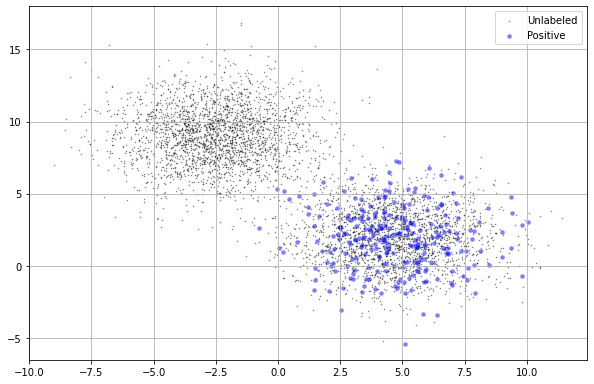

In [2]:
N = 5000
known_labels_ratio = 0.1
X, y = make_blobs(n_samples=N, centers=2, 
                  n_features=2, shuffle=True, 
                  cluster_std=2,
                #   cluster_std=5,
                  random_state=42)

rp = np.random.permutation(int(N/2))

data_P = X[y == 1][rp[:int(len(rp) * known_labels_ratio)]]

data_U = np.concatenate(
    (X[y == 1][rp[int(len(rp) * known_labels_ratio):]], X[y == 0]),
    axis=0)

print(f"labeled samples: {data_P.shape[0]}")

plt.figure(figsize=(10, 6.5))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', lw=1, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', lw=0, s=20, alpha=0.5, label='Positive')
plt.grid()
plt.legend();

3. Обучим 1000 деревьев решений, используя bagging
4. Предсказания делаем oob (out-of-the-bag) и затем для каждого примера мы все прогнозы усредняем

Что такое bagging (ссылка - https://en.wikipedia.org/wiki/Bootstrap_aggregating)

<img src='https://drive.google.com/uc?export=view&id=1Qcpg4-KWmDV8hL_DKdULd5580bQETaoy'>

In [3]:
NP = data_P.shape[0]
NU = data_U.shape[0]

num_trees = 1000
train_label = np.zeros(shape=(NP+NP,))
train_label[:NP] = 1.0
n_oob = np.zeros(shape=(NU,))
f_oob = np.zeros(shape=(NU, 2))

for i in range(num_trees):
    # Bootstrap resample
    bootstrap_sample = np.random.choice(np.arange(NU), replace=True, size=NP)
    
    # Positive set + bootstrapped unlabeled set
    data_bootstrap = np.concatenate((data_P, data_U[bootstrap_sample, :]), axis=0)

    # Train model
    model = DecisionTreeClassifier(class_weight='balanced')
    model.fit(data_bootstrap, train_label)
    
    # Index for the out of the bag (oob) samples
    idx_oob = sorted(set(range(NU)) - set(np.unique(bootstrap_sample)))
    
    # Transductive learning of oob samples
    f_oob[idx_oob] += model.predict_proba(data_U[idx_oob])
    n_oob[idx_oob] += 1

predict_proba = f_oob[:, 1] / n_oob

5. наконец, посчитаем Precision, Recall и оптимальный порог и посмотрим, как наш алгоритм справился (ведь мы для наших данных знаем реальные метки классов)

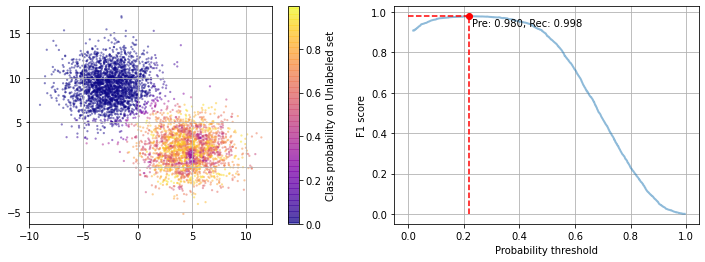

In [4]:
# Plot the class probabilities for the unlabeled samples
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
sp= ax1.scatter(data_U[:, 0], data_U[:, 1], c=predict_proba, 
                lw=0, s=5, alpha=0.5, cmap=plt.cm.plasma, label='unlabeled')
plt.grid()
plt.colorbar(sp, label='Class probability on Unlabeled set')

true_labels = np.zeros(shape=(data_U.shape[0]))
true_labels[:int(len(rp) * (1.0 - known_labels_ratio))] = 1.0

precision, recall, th = precision_recall_curve(true_labels, predict_proba)
ax2 = fig.add_subplot(1, 2, 2)
f1s = precision[:-1] * recall[:-1]
ax2.plot(th, f1s, lw=2, alpha=0.5)

best_th = np.argmax(f1s)
ax2.plot(th[best_th], f1s[best_th], c='r', marker='o')
ax2.plot([th[best_th], th[best_th]], [0.0,f1s[best_th] ], 'r--')
ax2.plot([0.0, th[best_th]], [f1s[best_th], f1s[best_th] ], 'r--')
ax2.annotate(f'Pre: {precision[best_th]:.3f}, Rec: {recall[best_th]:.3f}', 
             xy=(th[best_th]+ 0.01, f1s[best_th]-0.05))
ax2.set_ylabel('F1 score')
ax2.set_xlabel('Probability threshold')
plt.grid()


Видим, что наши данные очень неплохо разделяются и хорошие показатели pr/rec.

Получившуюся модель можно использовать больше даже никак конечная модель, а как инструмент разметки нашей базы.

## Пример 2

Есть аудитория магазина и покупки за некоторый период

Датасет предметов (товаров):

In [5]:
!wget 'https://drive.google.com/uc?export=download&id=1TRYfDdFMHrSS6HT4anx_b9P2hxUDsvxt' -O items.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [6]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt


items = pd.read_csv("items.csv")
print(f"Num unique items: {items.shape[0]}\nNum unique categories: {len(items['item_type'].unique())}")
items.head(3)

Num unique items: 10237
Num unique categories: 10


,Name,item_category,item_brand,item_weight,item_type
0,зубная паста лакалют актив 75мл,"Красота, гигиена, бытовая химия",splat,75мл,зубная паста
1,зубная паста лакалют сенситив 75мл,"Красота, гигиена, бытовая химия",splat,75мл,зубная паста
2,зубная паста лесной бальзам ромашка и облепиха...,"Красота, гигиена, бытовая химия",лесной бальзам,NaN,зубная паста


Покупки

In [7]:
!wget 'https://drive.google.com/uc?export=download&id=1XngPllkMD71ENaKetD9PuihFtJUWmpea' -O purchases.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [8]:
purchases = pd.read_csv("purchases.csv")
print(f"Num unique users: {len(purchases['user_id'].unique())}")
purchases.columns = ['user_id', 'Name']
purchases.head(3)

Num unique users: 32000


,user_id,Name
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо..."
1,ba82ad84-3a19-5a91-8e1e-7fd87628afb4,пюре тема говядина с гречкой с 8 месяцев
2,74a2856d-f0ec-59a6-89f3-1f80b294e852,колбаса микоян сервелат кремлевский варено-коп...


**Задача: Нужно провести акцию с предложением чая (со скидкой) 5 тысячам пользователей (всего у нас 32 тысячи)**

Варианты решения задачи:
1. Случайная выборка
2. Что-то более умное (сведем все к задаче lookalike)

Возможный алгоритм:
1. Выбираем по базе тех, кто покупал чай ранее - это наши позитивы 
2. Решаем задачу бинарной классификации (lookalike)
3. Скорим нашу аудиторию
4. Берем топ 5 тысяч
5. Запускаем рекламную кампанию

Далее дожидаемся окончания кампании и анализируем результаты

Для начала поджойним предметы и покупки

In [9]:
purchases = pd.merge(purchases, items)
purchases.head(3)

,user_id,Name,item_category,item_brand,item_weight,item_type
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад
1,b4a10859-3f8c-5dc1-8d5d-5977f9aa8bde,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад
2,464053f2-ead4-500e-8486-9d5d66c1bbd7,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад


Теперь посмотрим сколько у нас было пользователей, покупавших ранее чай

In [10]:
len(purchases[purchases['item_type'] == 'чай']['user_id'].unique())

1360

1360 любителей чая (нам нужно 5000 по условию задачи). 

Давайте разметим наш датасет (все кто покупал чай в прошлом - метка 1) - это класс 1. 

Мы предполагаем, что людям со схожими на класс 1 предпочтениями и покупками (но не покупавшие чай), также понравится и чай. На этом предположении мы и двигаемся дальше. 

In [11]:
purchases['y'] = purchases['item_type'].apply(lambda x: 1 if x == 'чай' else 0)
purchases.head()

,user_id,Name,item_category,item_brand,item_weight,item_type,y
0,ed6b1aaf-21df-5b75-9b7f-ed67926cd17c,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
1,b4a10859-3f8c-5dc1-8d5d-5977f9aa8bde,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
2,464053f2-ead4-500e-8486-9d5d66c1bbd7,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
3,baf7d53b-3170-5984-b05c-c5d2b8788d57,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0
4,ef6beb0e-a09e-5372-aa91-eb467f117aa8,"шоколад ""alpen gold"" белый с миндалем и кокосо...","Хлеб, сладости, снеки",alpen gold,90г,шоколад,0


Попробуем для начала использовать просто список прошлых покупок (поле Name)

In [12]:
X = purchases.groupby(['user_id']).agg({
    'Name': lambda x: list(x),
    'y': lambda x: max(x)
})

X['user_id'] = [i for i in X.index.values]
X.columns = ['purchases', 'y', 'user_id']
X = X[['user_id', 'purchases', 'y']]
X.index = range(len(X))
X.head(3)

,user_id,purchases,y
0,00002f01-66e4-5ab8-8d1a-1562a4ddd418,[зубная паста splat stress off антистресс 75мл...,0
1,0000fed8-b063-51ef-8ca4-c42c5bd022ad,[шоколад schogetten black & white молочный с к...,0
2,0004cfe8-bcb2-5a2c-904b-643e0469cbe3,"[шоколад воздушный темный 85г, сыр белебеевски...",0


Посмотрим на соотношение классов (P vs U), где P - позитивы и U - все остальные неразмеченные данные

In [13]:
X['y'].value_counts()

0    30640
1     1360
Name: y, dtype: int64

In [14]:
X['purchases'] = X['purchases'].apply(lambda x: " ".join(x), 1)
X.head()

,user_id,purchases,y
0,00002f01-66e4-5ab8-8d1a-1562a4ddd418,зубная паста splat stress off антистресс 75мл ...,0
1,0000fed8-b063-51ef-8ca4-c42c5bd022ad,шоколад schogetten black & white молочный с ку...,0
2,0004cfe8-bcb2-5a2c-904b-643e0469cbe3,шоколад воздушный темный 85г сыр белебеевский ...,0
3,000b8172-b96d-5c99-a418-fe1ca156bee1,шампунь pantene pro-v интенсивное восстановлен...,0
4,000bf80e-219c-53b7-a000-6c3474c2bd14,шоколад schogetten black & white молочный с ку...,0


Будем используем обычный random negative sample

In [15]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, X['y'], random_state=0)

У нас есть разметка (известные позитивы) и поле purchases (список покупок) из которого мы можем извлекать признаки. В качестве признаков будем использовать tfidf

In [16]:
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

pipeline = Pipeline([('purchases_selector', FeatureSelector(column='purchases')), 
                     ('purchases_tfidf', TfidfVectorizer()), 
                     ('clf', LogisticRegression())])

In [17]:
# обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('purchases_selector', FeatureSelector(column='purchases')),
                ('purchases_tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression())])

In [18]:
tfidf = pipeline.named_steps['purchases_tfidf']
len(tfidf.get_feature_names())

5848

In [19]:
df = pd.DataFrame.sparse.from_spmatrix(tfidf.transform(X_test['purchases'].iloc[:10]))
df = pd.DataFrame(df)
df.columns = tfidf.get_feature_names_out()
df

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

Получим прогнозы для "тестовой" выборки

In [ ]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Довольно неплохие на первый взгляд метрики. Давайте теперь проскорим всю выборку и отсортируем по убыванию прогноза (ведь нам в итоге нужно взять топ 5000 пользователей)

In [ ]:
X['y_pred'] = pipeline.predict_proba(X)[:, 1]
X = X.sort_values('y_pred', ascending=False)
X.head(3)

Наконец, возьмем наши топ 5000 пользователей

In [ ]:
selected_users = X.iloc[:5000]['user_id'].values

Давайте попробуем понять, чем они отличаются от всех остальных (если отличаются вообще)

In [ ]:
purchases[purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

In [ ]:
purchases[~purchases['user_id'].isin(selected_users)]['item_type'].value_counts(normalize=True)

Посмотрим на feature_importances

In [ ]:
feature_names = pipeline.named_steps["purchases_tfidf"].get_feature_names_out()
feature_weights = pipeline.named_steps["clf"].coef_[0]

weights = pd.DataFrame({
    'feature_name': feature_names,
    'feature_weight': feature_weights
}).sort_values('feature_weight', ascending=False)

# топ 100 слов
weights['feature_name'].iloc[:100].values

Понятно, что если в названии покупки есть что-то про чай, то это явный маркер для классификатора, что это объект класса 1. 

Также по распределению категорий видно также что топ5000 существенно отличаются от остальных

В рекламе одна из важнейших прикладных задач - lookalike. Часто она решается именно как задача PU

## Пример 3

Расмотрим пример на датасете из репозитория UCI - задача поиска поддельных купюр. Признаки - это 4 аппартно измеримые характеристики. 

Описание данных - https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Ссылка на google drive: https://drive.google.com/file/d/1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1fpVIAEHCbA-tbOlWsC3v1uaUwZ7MF8ih' -O data_banknote_authentication.txt

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_banknote_authentication.txt", header=None)
data.head(3)

У нас есть 4 признака и 1 целевая переменная (бинарная) - нужно определить поддельная купюра или нет

In [ ]:
print(data.shape)

Всего 1372 купюры

Посмотрим на соотношение классов

In [ ]:
data.iloc[:, -1].value_counts()

Разбиваем выборку на тренировочную и тестовую части и обучаем модель (в примере - градиентный бустинг)

In [ ]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

Проверяем качество

In [ ]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print(f"f1: {f1 * 100.0:.2f}%") 
    rec = recall_score(y_test, y_predict, average='binary')
    print(f"recall: {rec * 100.0:.2f}%") 
    prc = precision_score(y_test, y_predict, average='binary')
    print(f"precision: {prc * 100.0:.2f}%" ) 

    
evaluate_results(y_test, y_predict)

### Теперь очередь PU learning

Представим, что нам неизвестны негативы и часть позитивов

In [ ]:
mod_data = x_train.copy()
mod_data['label'] = y_train
mod_data = mod_data.reset_index(drop=True)

# mod_data = data.copy()
# get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:, -1].values == 1)[0]

# shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
perc = 0.25
pos_sample_len = int(np.ceil(perc * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [ ]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

* 124 позитивных примеров (1)
* 973 без разметки (-1)

In [ ]:
mod_data.head(10)

### random negative sampling

Помним, что (x_data) содержит целевой признак, который будем использовать для оценки качества

Отделими [:-2] как истиный класс для проверки, и [:-1] как данные для входной разметки PUL

In [ ]:
mod_data = mod_data.sample(frac=1)


data_N = mod_data[mod_data['class_test'] == -1]
data_P = mod_data[mod_data['class_test'] == 1]

neg_sample = data_N[:data_P.shape[0]]
sample_test = data_N[data_P.shape[0]:]
pos_sample = data_P.copy()

print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

In [ ]:
sample_train

In [ ]:
model = xgb.XGBClassifier()
sample_train.loc[sample_train['class_test'] == -1, 'class_test'] = 0

model.fit(sample_train.drop(columns=['class_test', 'label']), 
          sample_train['class_test'])

y_predict = model.predict(x_test)
evaluate_results(y_test, y_predict)

**Краткие выводы**

Positive-Unlabeled (PU) learning можно перевести как «обучение на основе положительных и неразмеченных данных». 

По сути, PU learning —  это аналог бинарной классификация для случаев, когда имеются размеченные данные только одного из классов, но доступна неразмеченная смесь данных обоих классов. 

В общем случае мы даже не знаем, сколько данных в смеси соответствует положительному классу, а сколько — отрицательному. На основе таких наборов данных мы хотим построить бинарный классификатор: такой же, как и при наличии размеченных данных обоих классов.

## Домашнее задание

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. Обучить любой классификатор (какой вам нравится)
3. Разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные примеры (класс 1), а только лишь часть
4. Применить random negative sampling для построения классификатора в новых условиях
5. Сравнить качество с решением из пункта 3 (построить отчет - таблицу метрик)
6. *Поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ файлы здесь 

In [53]:
import pandas as pd
import numpy as np
# последний признак назвал VY, видимо какой-то годовой доход, до налогов или после ничего непонятно. 
# Постановка задачи, все кто зарабатывает больше 50K считаем положительными героями.
data = pd.read_csv("DZ/adult.data", names=["age", "workclass", "fnlwgt", "education", "education-num",
                                          "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                                           "hours-per-week","native-country","VY"])
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,VY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [54]:
print(data.shape)

(32561, 15)


In [55]:
# data['VY'] = data['VY'].replace(to_replace=' <=50K', value='0')
# data['VY'] = data['VY'].replace(to_replace=' >50K', value='1')
data = data.replace({'VY':{' <=50K':0, ' >50K':1}})
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,VY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [56]:
data.iloc[:, -1].value_counts()

0    24720
1     7841
Name: VY, dtype: int64

In [57]:
# Результат соотношения 3 :1, ниже отсечки 50К, выше отсечки 50К . С такими данными теоретически д.б. хорошо и удобно работать.
# Разбиваем выборку на тренировочную и тестовую части и обучаем модель (градиентный бустинг)

In [58]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [59]:
#соберем наш простой pipeline
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [60]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,VY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [61]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,VY
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [62]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [63]:
from sklearn.pipeline import FeatureUnion

In [81]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,VY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [97]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                       'race', 'sex', 'native-country']
continuous_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
gender = Pipeline([
                ('selector', FeatureSelector(column='workclass')),
                ('ohe', OHEEncoder(key='workclass'))
            ])

gender.fit(x_train)
gender.transform(x_test).head(3)

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
14160,0,0,0,0,1,0,0,0,0
27048,0,0,0,0,0,0,0,1,0
28868,0,0,0,0,1,0,0,0,0


In [99]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col))
            ])
    
    final_transformers.append((cont_col, cont_transformer))

In [100]:
final_transformers

[('workclass',
  Pipeline(steps=[('selector', FeatureSelector(column='workclass')),
                  ('ohe', OHEEncoder(key='workclass'))])),
 ('education',
  Pipeline(steps=[('selector', FeatureSelector(column='education')),
                  ('ohe', OHEEncoder(key='education'))])),
 ('marital-status',
  Pipeline(steps=[('selector', FeatureSelector(column='marital-status')),
                  ('ohe', OHEEncoder(key='marital-status'))])),
 ('occupation',
  Pipeline(steps=[('selector', FeatureSelector(column='occupation')),
                  ('ohe', OHEEncoder(key='occupation'))])),
 ('relationship',
  Pipeline(steps=[('selector', FeatureSelector(column='relationship')),
                  ('ohe', OHEEncoder(key='relationship'))])),
 ('race',
  Pipeline(steps=[('selector', FeatureSelector(column='race')),
                  ('ohe', OHEEncoder(key='race'))])),
 ('sex',
  Pipeline(steps=[('selector', FeatureSelector(column='sex')),
                  ('ohe', OHEEncoder(key='sex'))])),
 ('na

In [101]:
data.shape

(32561, 15)

In [104]:
from sklearn.ensemble import RandomForestClassifier
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(n_estimators=100,random_state=42)),
])

In [105]:
# обучим наш пайплайн
pipeline.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('workclass',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='workclass')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='workclass'))])),
                                                ('education',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='education')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='education'))])),
                                                ('marital-status',
                                                 Pipeline(steps=[('selec

In [107]:
y_predict = pipeline.predict(x_test)

In [108]:
# Оценка качества
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

    
evaluate_results(y_test, y_predict)

Classification results:
f1: 66.71%
roc: 77.28%
recall: 61.93%
precision: 72.30%


Теперь очередь за PU learning
Представим, что нам неизвестны негативы и часть позитивов

In [109]:
mod_data = data.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 1961/7841 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [110]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    30600
 1     1961
Name: class_test, dtype: int64


In [111]:
mod_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,VY,class_test
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,-1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,-1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,-1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,-1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,-1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,-1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1,-1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,-1


In [112]:
_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

In [120]:
print(_data)

[[39 ' State-gov' 77516 ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' 83311 ... 0 13 ' United-States']
 [38 ' Private' 215646 ... 0 40 ' United-States']
 ...
 [58 ' Private' 151910 ... 0 40 ' United-States']
 [22 ' Private' 201490 ... 0 20 ' United-States']
 [52 ' Self-emp-inc' 287927 ... 0 40 ' United-States']]


In [121]:
print(y_labeled)

[-1 -1 -1 ... -1 -1 -1]


In [123]:
print(y_positive)

[0 0 0 ... 0 0 1]


### 1. random negative sampling

In [125]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)
sample_train.head(3)

(1961, 16) (1961, 16)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,VY,class_test
27661,32,Private,74883,Bachelors,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Philippines,0,-1
12893,49,Local-gov,79019,Masters,14,Widowed,Prof-specialty,Unmarried,White,Female,0,0,16,United-States,0,-1
9084,56,Private,139616,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,1,1


In [119]:
#Дальше делал по инструкции, но не взлетело решение (
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
y_predict = model.predict(sample_test.iloc[:,:-2].values)
evaluate_results(sample_test.iloc[:,-2].values, y_predict)

ValueError: could not convert string to float: ' Private'

Ссылки:

1. https://arxiv.org/pdf/1811.04820.pdf
2. https://habr.com/ru/company/JetBrains-education/blog/512032/
3. https://en.wikipedia.org/wiki/Bootstrap_aggregating
4. https://www.cs.uic.edu/~liub/publications/EMNLP-2010-no-negative.pdf
5. https://towardsdatascience.com/lookalikes-finding-needles-in-a-haystack-683bae8fdfff